In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [38]:
RED = "#ff5757"
GREEN = "#7ed957"
BLACK = "#262626"
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "#262626",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "#262626",
    "figure.edgecolor": "black",
    "savefig.facecolor": "#262626",
    "savefig.edgecolor": "black"})

# Bagging

In [39]:
def plot_dataset(X, y, **kwargs):
    COLORS = np.array([RED, GREEN])
    a = X[:,0]
    b = X[:,1]
    plt.scatter(a, b, c=COLORS[y])
    plt.xlabel(kwargs.get("xlabel"))
    plt.ylabel(kwargs.get("ylabel"))
    plt.axis(kwargs.get("axis"))

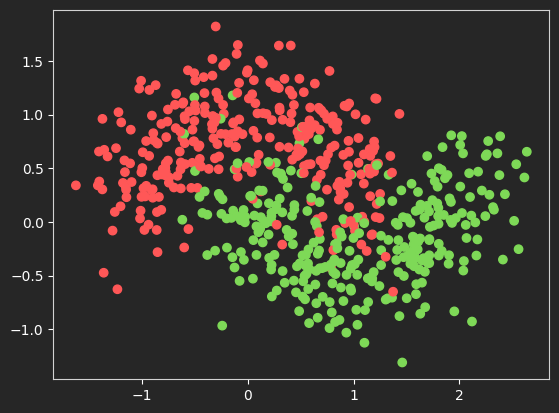

In [40]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=600, noise=0.30, random_state=42)
plot_dataset(X, y)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),# model to use
    n_estimators=400,        # number of models/predictors
    max_samples=100,         # instances in each sample
    bootstrap=True,          # True for Bagging, False for Pasting
    n_jobs=-1                # use all available cores for training
)

In [43]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=400, n_jobs=-1)

In [44]:
def plot_decision_boundaries(clf, X, y):
    X1_mesh = np.linspace(min(X[:,0]), max(X[:,0]), 1000)
    X2_mesh = np.linspace(min(X[:,1]), max(X[:,1]), 1000)
    X1, X2 = np.meshgrid(X1_mesh, X2_mesh)
    y_pred = clf.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = y_pred.reshape(X1.shape)
    colors = ListedColormap([RED,"#ffffff",GREEN])
    plt.contourf(X1, X2, Z, alpha=0.3, cmap=colors)

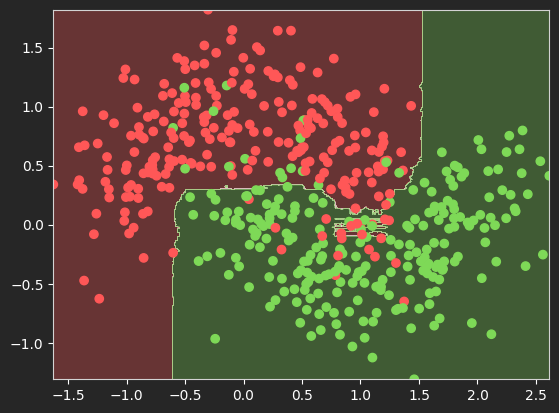

In [45]:
plot_decision_boundaries(bag_clf, X_train, y_train)
plot_dataset(X_train, y_train)

In [46]:
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)

DecisionTreeClassifier()

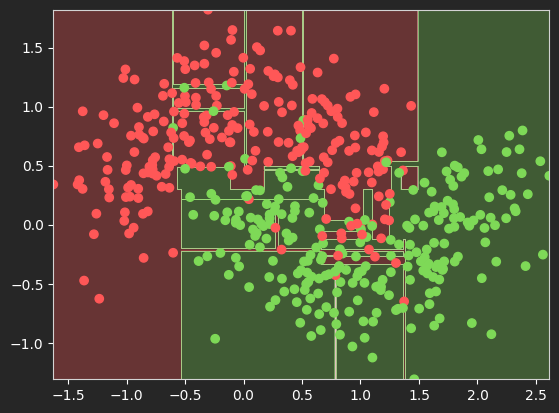

In [47]:
plot_decision_boundaries(dec_clf, X_train, y_train)
plot_dataset(X_train, y_train)

# Out of Bag Evaluation

In [48]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True
)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [49]:
bag_clf.oob_score_ # oob score

0.9020833333333333

In [51]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred) # accuracy score  (Close enough to oob score)

0.9083333333333333